<a href="https://www.kaggle.com/code/iancostermani/notebook3fb83d6acf?scriptVersionId=129210420" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importando as bibliotecas


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, f1_score,average_precision_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier
from skopt import BayesSearchCV
from sklearn.ensemble import IsolationForest
from skopt.space import Integer, Real, Categorical

In [2]:
df=pd.read_csv('/kaggle/input/projeto-4/hotel_bookings.csv')
pd.set_option('display.max_columns',None)
pd.options.plotting.backend = "plotly"
colors = ['royalblue','midnightblue']


In [3]:
df.shape

(119390, 31)

# **Análise exploratória**

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
#eliminando linhas duplicadas
df=df.drop_duplicates()
df.shape

(87391, 31)

*Note que o número de linhas do nosso DataFrame caiu bastante (de 119390 para 87391), o que mostra que haviam muitos dados duplicados e que se não fossem removidos poderiam afetar nosso modelo com  vazamento de dados*

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87391.000000,87391.000000,87391.000000,87391.000000,87391.000000,87391.000000,87391.000000,87391.000000,87387.000000,87391.000000,87391.000000,87391.000000,87391.000000,87391.000000,75198.000000,5259.000000,87391.000000,87391.000000,87391.000000,87391.000000
mean,0.274857,79.886773,2016.210319,26.837958,15.815233,1.005275,2.625362,1.875788,0.138648,0.010825,0.039077,0.030381,0.184001,0.271607,94.137251,183.081384,0.749608,106.337729,0.084231,0.698573
std,0.446445,86.051087,0.686075,13.674690,8.835157,1.031934,2.053575,0.626517,0.455893,0.113600,0.193780,0.369112,1.731943,0.727260,113.188289,130.557608,10.016016,55.012866,0.281541,0.831947
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Por meio do método describe(), verificamos o resumo estatístico do DataFrame, nele é possível identificar:
* *Variáveis com sua média e mediana bastante discreprantes*
* *Variáveis com valor máximo muito discrepante do 75º percentil* 
* *Variáveis com desvio padrão(std) muito alto*

Essa breve análise já indica a presença de muitos outliers no DataFrame, e que podem ser confirmados ao visualizar o BoxPlot das variáveis abaixo: 

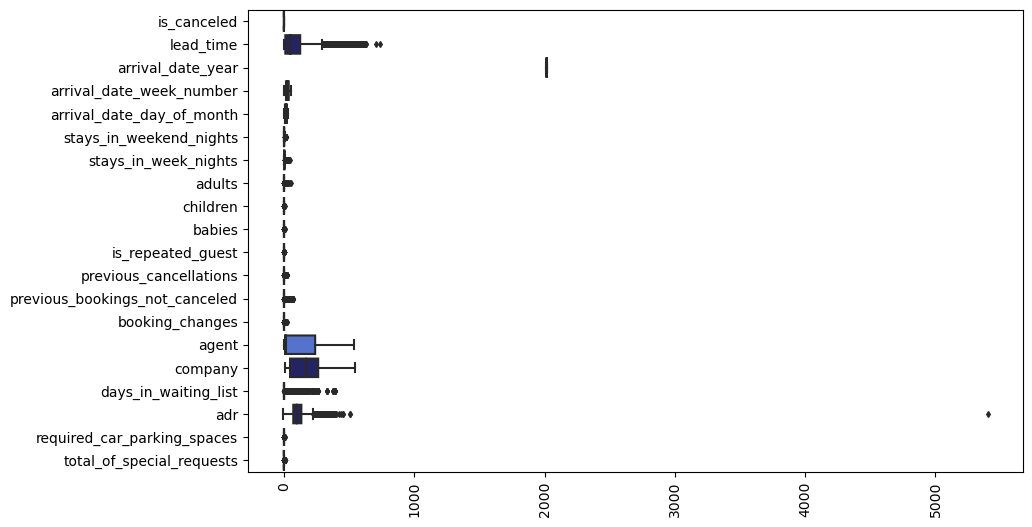

In [7]:
# plotando boxplot das variáveis numéricas
# Configura o tamanho do gráfico
plt.figure(figsize=(10,6))

# Cria o boxplot ajustado
sns.boxplot(data=df, orient="h", palette=colors, notch=True, linewidth=1.5, fliersize=3)

# Exibe o gráfico

plt.xticks(rotation=90)
plt.show()

*O BoxPlot confirma a presença de muitos outliers no nosso DataFrame, no entanto eles podem ser importantes para captar algum comportamento incomum dos clientes, e por isso não vão ser removidos de imediato. Nesse projeto os outliers vão ser tratados apenas na etapa de pré-processamento dos dados, com uma detecção de anomalias e com a escolha de padronizadores e modelos menos sensíveis à presença desses outliers(ex:RobustScaler e modelos de árvores).*

# Analisando as características das reservas:

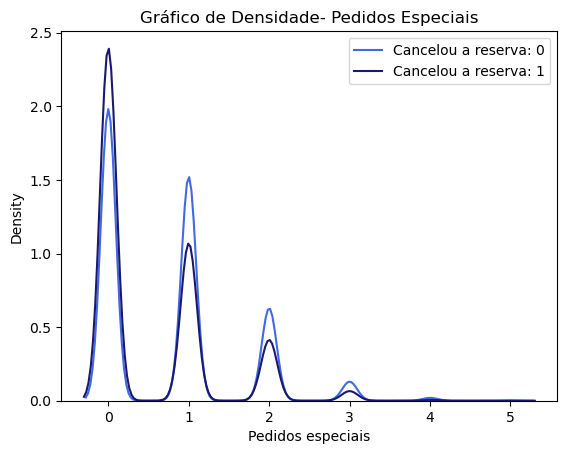

In [8]:
#plotando gráfico dos pedidos especiais relacionado com a taxa de cancelamento
churn_values = [0,1]
for churn_value in churn_values:
    sns.kdeplot(df[df['is_canceled'] == churn_value]['total_of_special_requests'], label=f'Cancelou a reserva: {churn_value}',color=colors[churn_value])
    
plt.xlabel('Pedidos especiais')
plt.ylabel('Density')
plt.title('Gráfico de Densidade- Pedidos Especiais')
plt.legend()

   **Observa-se no gráfico que:**
1. Há uma densidade maior de reservas canceladas quando não há nenhum pedido especial de reserva.


Text(0.5, 1.0, 'Tempo Reservas - Canceladas')

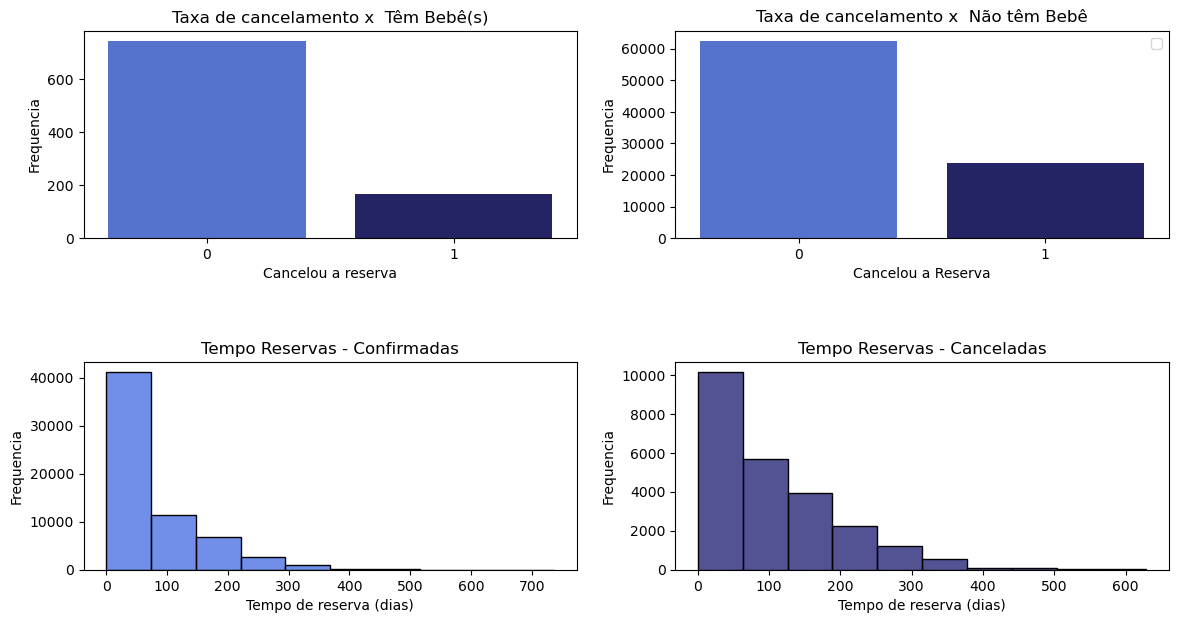

In [9]:

#plotando graficos comparativo entre a taxa de cancelamento em reservas com bebê x sem bebê
fig, ax = plt.subplots(1, 2, figsize = (14, 7))
fig.subplots_adjust(hspace=0.6)

plt.subplot(2, 2, 1)
sns.countplot(data=df,x=df[df['babies']!=0].is_canceled,palette=colors, label='Cancelou a reserva: 1')
plt.xlabel('Cancelou a reserva')
plt.ylabel('Frequencia')
plt.title('Taxa de cancelamento x  Têm Bebê(s)')



plt.subplot(2, 2, 2)
sns.countplot(data=df,x=df[df['babies']==0].is_canceled,palette=colors)
plt.xlabel('Cancelou a Reserva')
plt.ylabel('Frequencia')
plt.title('Taxa de cancelamento x  Não têm Bebê')
plt.legend()


#plotando graficos do tempo entre a reserva até a chegada em reservas canceladas x concluidas 
plt.subplot(2, 2, 3)
sns.histplot(data=df,x=df[df['is_canceled']==0].lead_time,bins=10,color=colors[0])
plt.xlabel('Tempo de reserva (dias)')
plt.ylabel('Frequencia')
plt.title('Tempo Reservas - Confirmadas')

plt.subplot(2, 2, 4)
sns.histplot(data=df,x=df[df['is_canceled']==1].lead_time,bins=10,color=colors[1])
plt.xlabel('Tempo de reserva (dias)')
plt.ylabel('Frequencia')
plt.title('Tempo Reservas - Canceladas')




**Analisando os gráficos, podemos fazer algumas conclusões:**
* As reservas que incluem bebês têm menor risco de cancelamento. 
* As reservas feitas com mais antecedência correm maior risco de cancelamento.

In [10]:
# Comparando algumas features numéricas interessantes com a variável alvo
lista_num=['previous_cancellations','previous_bookings_not_canceled','days_in_waiting_list','adr']
correlacao= df[lista_num].corrwith(df['is_canceled'])
correlacao=pd.DataFrame(correlacao)
correlacao

,0
previous_cancellations,0.051334
previous_bookings_not_canceled,-0.052148
days_in_waiting_list,0.004472
adr,0.128016


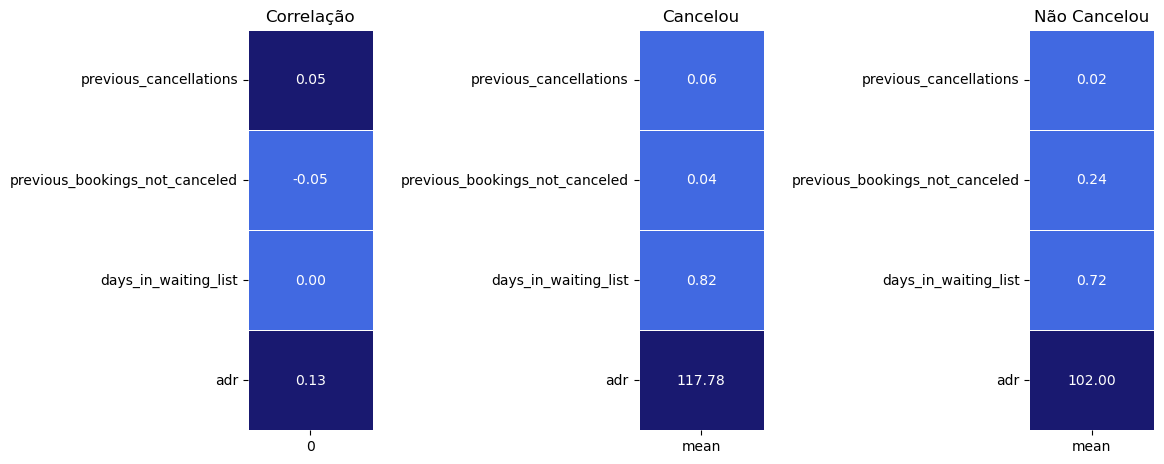

In [11]:
# Criando gráfico comparativo entre algumas features numéricas com a variável alvo
fig = plt.figure(figsize = (12, 5))

# Grid com 1 linha e 3 colunas
gs = fig.add_gridspec(1, 3)

plt.subplot(gs[0, 0])
sns.heatmap(correlacao, annot = True, cmap = colors ,linewidths = 0.4 ,cbar = False, fmt = '.2f',)
plt.title('Correlação')

plt.subplot(gs[0, 1])
sns.heatmap(df[lista_num][df['is_canceled'] == 1].describe().T[["mean"]], annot = True, cmap = colors, linewidths = 0.4, cbar = False, fmt = '.2f')
plt.title('Cancelou')

plt.subplot(gs[0, 2])
sns.heatmap(df[lista_num][df['is_canceled'] == 0].describe().T[["mean"]], annot = True, cmap = colors, linewidths = 0.4, cbar = False, fmt = '.2f')
plt.title('Não Cancelou')

fig.tight_layout(pad = 2)

plt.show()

**Note alguns fatos interessantes, retirados dos dados estatísticos:**
* O preço da diária(adr) é um fator de risco relevante, sendo mais cara em reservas canceladas.
* O histórico de reservas concluídas do usuário é um fator importante para determinar o risco de novo cancelamento.
* Assim como em reservas concluídas, o histórico de reservas anteriores canceladas também influencia no risco.

0    63371
1    24020
Name: is_canceled, dtype: int64

Reservas canceladas representam 27.49% do dataset.



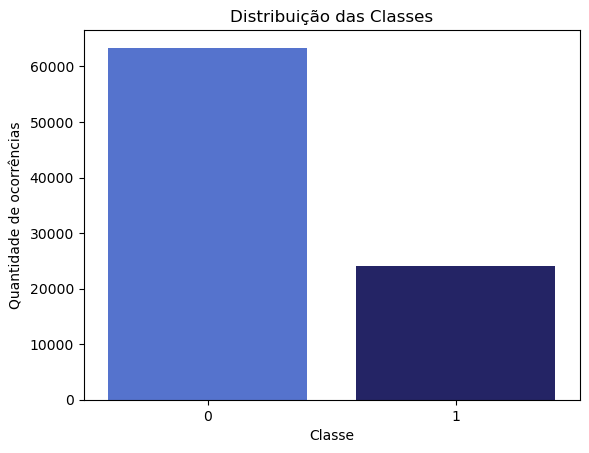

In [12]:
#Analisando o balanceamento de Classes
print(df['is_canceled'].value_counts())
print('\nReservas canceladas representam {:.2f}% do dataset.\n'.format((df[df.is_canceled == 1].shape[0] / df.shape[0]) * 100))

# Plotando gráfico de barras para as Classes
sns.countplot(data=df,x='is_canceled',palette=colors);
plt.title('Distribuição das Classes')
plt.ylabel('Quantidade de ocorrências')
plt.xlabel('Classe')
plt.show();

Note que as reservas canceladas representam cerca de 27,49% do DataFrame, para evitar que o modelo fique enviesado, trataremos desse balanceio também na etapa de preparação dos dados.

# **Preparação dos dados:**

In [13]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/07/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/07/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/07/15
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/07/15
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/07/15
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/05/15
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/04/15
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,240.0,NaN,0,Transient,123.0,0,0,Canceled,23/06/15


In [14]:
#checagem de valores nulos
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
agent                             12193
company                           82132
days_in_waiting_list                  0


Algumas features não serão usadas no nosso modelo,como 'company' por ter mais de 90% de valores ausentes, e os 'reservation_status' pois dizem a mesma coisa que nossa variável dependente.

In [15]:
#dropando features indesejáveis
df.drop('company',axis=1,inplace=True)
df.drop('reservation_status',axis=1,inplace=True)
df.drop('reservation_status_date',axis=1,inplace=True)



No método describe() é possível visualizar que há valores negativos para feature de preço da diária(adr), apesar de também ser uma anomalia, esses se caracterizam como um erro de registro, e portando devem ser removidos

In [16]:
#removendo os valores negativos da feature 'adr'
neg_values = df.loc[df['adr'] <= 0]
df=df.drop(neg_values.index)

Para substituir os valores ausentes das outras features usaremos o valor mais frequente(moda),foi o método escolhido por se tratarem apenas de variáveis categóricas e discretas. 

In [17]:
moda=df['country'].mode()[0]
moda_crianca=df['children'].mode()[0]
df['country'].fillna(moda,inplace=True)
df['children'].fillna(moda_crianca,inplace=True)
df['agent'].fillna(0,inplace=True)
df.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [18]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.182692,0.087074,0.002734,0.005111,0.056368,0.078883,0.083145,0.067244,-0.020528,-0.082199,0.053114,-0.050101,-0.092675,-0.001684,0.004983,0.118031,-0.186456,-0.122381
lead_time,0.182692,1.000000,0.140411,0.103054,0.009686,0.231639,0.309126,0.145209,0.028385,-0.002642,-0.134628,0.009080,-0.074839,0.080095,0.076080,0.130985,0.005384,-0.087836,0.037510
arrival_date_year,0.087074,0.140411,1.000000,-0.512014,-0.010334,0.000531,-0.001224,0.058431,0.040485,-0.022648,0.028172,-0.057337,0.027383,0.009108,-0.003541,-0.027305,0.169855,-0.043523,0.061870
arrival_date_week_number,0.002734,0.103054,-0.512014,1.000000,0.094866,0.029248,0.030917,0.025473,0.013936,0.013393,-0.041265,0.007337,-0.020799,0.014237,0.020028,0.012162,0.109471,0.011024,0.048822
arrival_date_day_of_month,0.005111,0.009686,-0.010334,0.094866,1.000000,-0.018240,-0.029565,0.003768,0.015485,-0.000497,-0.001535,-0.007308,0.002377,0.006920,0.004952,0.004641,0.021785,0.008911,-0.001464
stays_in_weekend_nights,0.056368,0.231639,0.000531,0.029248,-0.018240,1.000000,0.545614,0.102199,0.027776,0.015108,-0.092451,-0.017679,-0.052100,0.031671,0.158870,-0.033096,0.016963,-0.044992,0.034008
stays_in_week_nights,0.078883,0.309126,-0.001224,0.030917,-0.029565,0.545614,1.000000,0.112207,0.029275,0.017181,-0.095843,-0.016283,-0.055504,0.063212,0.192423,0.000322,0.028211,-0.046509,0.038931
adults,0.083145,0.145209,0.058431,0.025473,0.003768,0.102199,0.112207,1.000000,0.027641,0.019823,-0.204187,-0.047923,-0.146935,-0.045439,0.035009,-0.016071,0.306493,0.009034,0.144980
children,0.067244,0.028385,0.040485,0.013936,0.015485,0.027776,0.029275,0.027641,1.000000,0.016188,-0.043295,-0.018238,-0.028470,0.034083,0.041393,-0.020288,0.335601,0.035921,0.044068
babies,-0.020528,-0.002642,-0.022648,0.013393,-0.000497,0.015108,0.017181,0.019823,0.016188,1.000000,-0.013285,-0.005261,-0.009179,0.085918,0.030348,-0.006729,0.025886,0.030212,0.093778


# Separando variáveis Numéricas e Categóricas

In [19]:
categoricos=[]
numericos=[]
for features in df.columns:
    if df[features].dtype== object:
        categoricos.append(features)
    else:
        numericos.append(features)
df[categoricos].head(23)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient
6,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient
7,Resort Hotel,July,FB,PRT,Direct,Direct,C,C,Transient
8,Resort Hotel,July,BB,PRT,Online TA,TA/TO,A,A,Transient
9,Resort Hotel,July,HB,PRT,Offline TA/TO,TA/TO,D,D,Transient
10,Resort Hotel,July,BB,PRT,Online TA,TA/TO,E,E,Transient
11,Resort Hotel,July,HB,PRT,Online TA,TA/TO,D,D,Transient
12,Resort Hotel,July,BB,USA,Online TA,TA/TO,D,E,Transient


# Transformando as variaveis categoricas

In [20]:
encoder=LabelEncoder()
for col in categoricos:
    df[col]=encoder.fit_transform(df[col])
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0.0,0,2,75.00,0,0
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,304.0,0,2,75.00,0,0
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,240.0,0,2,98.00,0,1
6,1,0,0,2015,5,27,1,0,2,2,0.0,0,0,135,3,1,0,0,0,2,2,0,0.0,0,2,107.00,0,0
7,1,0,9,2015,5,27,1,0,2,2,0.0,0,1,135,3,1,0,0,0,2,2,0,303.0,0,2,103.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,0.0,0,0,15,5,3,0,0,0,0,0,0,394.0,0,2,96.14,0,0
119386,0,0,102,2017,1,35,31,2,5,3,0.0,0,0,56,6,3,0,0,0,4,4,0,9.0,0,2,225.43,0,2
119387,0,0,34,2017,1,35,31,2,5,2,0.0,0,0,43,6,3,0,0,0,3,3,0,9.0,0,2,157.71,0,4
119388,0,0,109,2017,1,35,31,2,5,2,0.0,0,0,59,6,3,0,0,0,0,0,0,89.0,0,2,104.40,0,0


# *Balanceamento de classes

In [21]:
from imblearn.under_sampling import RandomUnderSampler

# definir o conjunto de features (X) e o target (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# criar uma instância do RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# aplicar o undersampling nos dados
X_resampled, y_resampled = rus.fit_resample(X, y)

# imprimir o tamanho dos dados antes e depois do undersampling
print("Tamanho dos dados antes do undersampling:", X.shape[0])
print("Tamanho dos dados depois do undersampling:", X_resampled.shape[0])

Tamanho dos dados antes do undersampling: 85612
Tamanho dos dados depois do undersampling: 47670


In [22]:
X_resampled.shape

(47670, 27)

# Separando os dados de treino e de teste

In [23]:
X=X_resampled
y=y_resampled
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.3)

# Tratamento de outliers

*Nessa etapa usaremos o **Isolation Forest** para identificar anomalias no conjunto de treinamento e teste de dados,no entanto, em vez de remover as anomalias, as predições de anomalia serão adicionadas como uma nova coluna nos dados originais. A ideia por trás disso é que a identificação das anomalias sirvam como indicativas de comportamentos incomuns dos clientes que afetam a probabilidade de cancelamento e assim, melhorarem a precisão da previsão do modelo.*


In [24]:
# Identificando anomalias usando o Isolation Forest
clf = IsolationForest(random_state=42, contamination=0.05)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_val)

# Adicionando as predições de anomalia como uma nova coluna nos dados originais
X_train['IsOutlier'] = y_pred_train
X_val['IsOutlier'] = y_pred_test


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


# Padronizando 


In [25]:
# Salvando os nomes das colunas
nomes_colunas = X_train.columns.tolist()

# Aplicando o RobustScaler aos de treino
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Aplicando o mesmo scaler dos dedos de treino nos dados teste
X_val_scaled= scaler.transform(X_val)
# Convertendo o resultado para um dataframe e atribuir os nomes das colunas
df_padronizado = pd.DataFrame(X_train_scaled, columns=nomes_colunas)


# Aplicando o StandardScaler aos dados de treino
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train_scaled)

#Aplicando o mesmo scaler dos dedos de treino nos dados teste
X_val_scaled2= scaler.transform(X_val_scaled)
# Convertendo o resultado para um dataframe e atribuir os nomes das colunas
df_padronizado = pd.DataFrame(X_train_scaled2, columns=nomes_colunas)
df_padronizado





,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,IsOutlier
0,-0.764902,-0.863866,-0.355231,0.810240,-0.289225,1.720666,-1.010184,-0.837650,-1.81816,-0.321837,-0.096746,-0.527652,-0.279302,0.617883,0.444494,-0.166109,-0.090695,-0.084852,-0.695786,-0.810536,-0.345810,-0.657990,-0.073569,-0.102383,-0.107365,-0.24996,-0.801003,0.229456
1,-0.764902,1.063528,1.115269,-0.055513,0.157705,0.017800,0.930507,-0.837650,0.20068,3.823039,-0.096746,-0.527652,-1.634431,0.617883,0.444494,-0.166109,-0.090695,-0.084852,1.993812,1.761331,-0.345810,-0.657990,-0.073569,-0.102383,1.324021,-0.24996,0.428297,0.229456
2,-0.764902,-0.262972,-0.355231,1.098824,1.424008,-0.549822,-0.039839,-0.349754,0.20068,-0.321837,-0.096746,-0.527652,0.986966,-1.802182,-1.837227,-0.166109,-0.090695,-0.084852,-0.695786,-0.810536,1.135492,-0.612231,-0.073569,-0.102383,-0.510157,-0.24996,-0.801003,0.229456
3,-0.764902,0.111169,1.115269,0.521655,-1.034109,1.720666,-1.010184,-0.349754,2.21952,-0.321837,-0.096746,1.296458,-0.723607,0.617883,0.444494,-0.166109,-0.090695,-0.084852,1.455892,1.246957,-0.345810,-0.657990,-0.073569,-0.102383,1.235603,-0.24996,1.657598,0.229456
4,-0.764902,-0.682464,-0.355231,-0.632682,-1.332063,1.153044,-0.039839,-0.349754,2.21952,-0.321837,-0.096746,-0.527652,-0.834683,0.617883,0.444494,-0.166109,-0.090695,-0.084852,0.917973,0.732584,-0.345810,-0.657990,-0.073569,-0.102383,0.276172,-0.24996,0.428297,0.229456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33364,-0.764902,1.222254,-0.355231,-1.209850,0.604635,0.585422,0.930507,-1.325546,0.20068,-0.321837,-0.096746,1.296458,-0.190441,0.617883,0.444494,-0.166109,-0.090695,-0.084852,-0.695786,-0.810536,-0.345810,-0.657990,-0.073569,-0.102383,0.545945,-0.24996,-0.801003,0.229456
33365,1.307357,-0.433037,1.115269,0.233071,-0.214737,-0.322774,0.930507,2.089725,0.20068,1.750601,-0.096746,-0.527652,1.031397,-0.188805,0.444494,-0.166109,-0.090695,-0.084852,0.380053,0.218211,-0.345810,0.485982,-0.073569,-0.102383,0.988034,-0.24996,-0.801003,0.229456
33366,-0.764902,-0.988579,1.115269,-1.209850,0.306682,-1.571542,-1.010184,-0.837650,-1.81816,-0.321837,-0.096746,-0.527652,1.031397,-2.608870,-2.978087,6.020148,-0.090695,3.106561,0.917973,0.732584,-0.345810,-0.740356,-0.073569,-0.102383,-0.328409,-0.24996,1.657598,-4.358143
33367,-0.764902,0.326583,1.115269,-1.209850,0.604635,1.720666,0.930507,0.138141,0.20068,-0.321837,-0.096746,2.208513,-0.656961,0.617883,0.444494,-0.166109,-0.090695,-0.084852,-0.695786,-0.810536,-0.345810,-0.657990,-0.073569,-0.102383,0.261043,-0.24996,0.428297,0.229456


# Criando os Modelos

In [26]:
log_reg= LogisticRegression()
ran_for=RandomForestClassifier(n_estimators=100)
XGB = XGBClassifier()
lgbm=LGBMClassifier(random_state=0)



In [27]:
# Criando funções para plotar o resultado do modelo
def modelo(classificador, X_train, y_train, X_test, y_test):
    
    classificador.fit(X_train, y_train)
    y_pred = classificador.predict(X_test)
    fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)
    score = cross_val_score(classificador, X_train, y_train, cv = fold, scoring = 'roc_auc', n_jobs = -1).mean()
    print(f"Score Cross Validation: {score:.2%}")
    print(f"Average Precision: {average_precision_score(y_test, y_pred):.2%}")
    print(f"Precision Score: {precision_score(y_test, y_pred):.2%}")
    print(f"Recall Score: {recall_score(y_test, y_pred):.2%}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2%}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.2%}")
    

***-Logistic Regression***


In [28]:
modelo(log_reg,X_train_scaled2,y_train,X_val_scaled2,y_val)

Score Cross Validation: 79.82%
Average Precision: 66.40%
Precision Score: 71.51%
Recall Score: 75.65%
F1 Score: 73.52%
ROC AUC Score: 72.43%


***-Random Forest Classifier***

In [29]:

modelo(ran_for,X_train_scaled2,y_train,X_val_scaled2,y_val)

Score Cross Validation: 90.72%
Average Precision: 77.30%
Precision Score: 82.20%
Recall Score: 84.50%
F1 Score: 83.34%
ROC AUC Score: 82.91%


***- XGBoost***

In [30]:
modelo(XGB,X_train_scaled2,y_train,X_val_scaled2,y_val)


Score Cross Validation: 91.33%
Average Precision: 77.71%
Precision Score: 81.96%
Recall Score: 86.47%
F1 Score: 84.16%
ROC AUC Score: 83.52%


***-LGBMClassifier***

In [31]:
modelo(lgbm,X_train_scaled2,y_train,X_val_scaled2,y_val)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Score Cross Validation: 91.30%
Average Precision: 77.24%
Precision Score: 81.54%
Recall Score: 86.14%
F1 Score: 83.78%
ROC AUC Score: 83.11%


# Otimização dos Hiperparametros

In [32]:
ran_for.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])